## Exam 2 Week 11    

### Add your first and last name here.

#### Value 2000 pts

In [35]:
import matplotlib.pyplot as plt
# Import necessary packages

# Utilty packages
import seaborn as sns

# Data management packages
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import gaussian_kde
import openpyxl

# Machine Learning packages
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Other packages (define the category however you like) 

ModuleNotFoundError: No module named 'statsmodels'

### Question 1 (1000 pts)


Classification is a type of supervised machine learning problem where the target (response) variable is categorical. Given the training data, which contains the known label, the classifier approximates a mapping function (f) from the input variables (X) to output variables (y). 

1. Using the statistical and graphical techniques from Cast Study 5, perform an EDA on the Iris dataset with the intention of determining what phenotypic characteristics (meausrements of sepal and petal dimensions) are likely to be most useful in predicting the species of the plant. Support your observations with statistics and graphs. 

2. Build a KNN Classifier in `scikit-learn` that predicts Iris species. Use a training/test split of 70/30. 
    - First, use only the best two measurements to predict the species. Vary the k-value to acquire the best accuracy and the most generalizable model (the k-value at which maximizes both training and test accuracy scores).
    - Next, use all available measurements to predict the species. Vary the k-value as before.
    - Compare and explain the results from the first two parts. For example, you should explain which one did better and whether the k-values the same? If not, why? 

<h3> Loading Dataset</h3>

In [4]:
# Provide your answer in cells here and below.
iris_data = datasets.load_iris()

#when converting to a data from just put the feature names from the iris dataset as the columns
#saves time since you don't need to type it all out.
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
target_names = iris_data["target_names"] #names of species we need

#to clean up the column names.
for x in iris_df.columns:
    newName = " ".join(x[:-5].split())
    iris_df.rename(columns={x: newName}, inplace=True)
    
#np.concatentate joins arrays on an existing axis and then np.repeat just repeats 
#stuff so just, stuff both of then into a new column.
iris_df["species"] = np.concatenate([np.repeat(x, 50) for x in target_names])
iris_df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

<h3>Statistics</h3>

In [5]:
"""
This is where we do the stat analysis and get on numbers on our screen.
we are going to perform a t-test between all of the species.
"""
species_set = iris_df[iris_df["species"] == "setosa"]
species_ver = iris_df[iris_df["species"] == "versicolor"]
species_vir = iris_df[iris_df["species"] == "virginica"]

combinations = [
    (species_ver, species_vir, "Virginica vs Versicolor"),
    (species_set, species_vir, "Setosa vs Virginica"),
    (species_set, species_ver, "Setosa vs Versicolor"),
]
"""
This code snippet comes from chatgpt but... I do have my own code to work with
calculating t-value and p-value ect but, it doesn't handle dataframe and other stuff.
but the t-test is calculated with the formula (m-mu)/(s/sqrt(n)) m=mean mu=assumed mean, s= sample standard deviation, and n =population size
"""
measurements = ['sepal length', 'sepal width', 'petal length', 'petal width']

for (sp1, sp2, label) in combinations:
    for measurement in measurements:
        t_stat, p_value = ttest_ind(sp1[measurement], sp2[measurement])
        print(f"{measurement} - {label}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

sepal length - Virginica vs Versicolor: t-statistic = -5.629, p-value = 0.000
sepal width - Virginica vs Versicolor: t-statistic = -3.206, p-value = 0.002
petal length - Virginica vs Versicolor: t-statistic = -12.604, p-value = 0.000
petal width - Virginica vs Versicolor: t-statistic = -14.625, p-value = 0.000
sepal length - Setosa vs Virginica: t-statistic = -15.386, p-value = 0.000
sepal width - Setosa vs Virginica: t-statistic = 6.450, p-value = 0.000
petal length - Setosa vs Virginica: t-statistic = -49.986, p-value = 0.000
petal width - Setosa vs Virginica: t-statistic = -42.786, p-value = 0.000
sepal length - Setosa vs Versicolor: t-statistic = -10.521, p-value = 0.000
sepal width - Setosa vs Versicolor: t-statistic = 9.455, p-value = 0.000
petal length - Setosa vs Versicolor: t-statistic = -39.493, p-value = 0.000
petal width - Setosa vs Versicolor: t-statistic = -34.080, p-value = 0.000


<h2> graphs </h2>

<Axes: title={'center': 'Comparison between various species based on sapel length and width'}, xlabel='sepal length', ylabel='sepal width'>

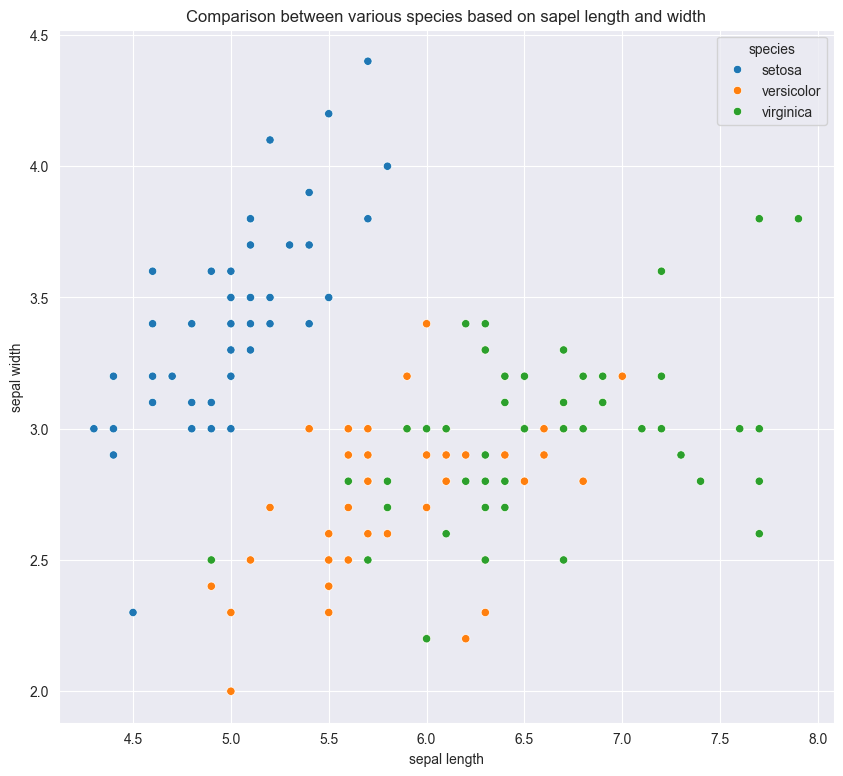

In [6]:
plt.figure(figsize=(10,9))
plt.title("Comparison between various species based on sapel length and width")
sns.scatterplot(x= iris_df["sepal length"], y= iris_df["sepal width"], hue= iris_df["species"], data=iris_df)

<Axes: title={'center': 'Comparison between various species based on petal length and width'}, xlabel='petal length', ylabel='petal width'>

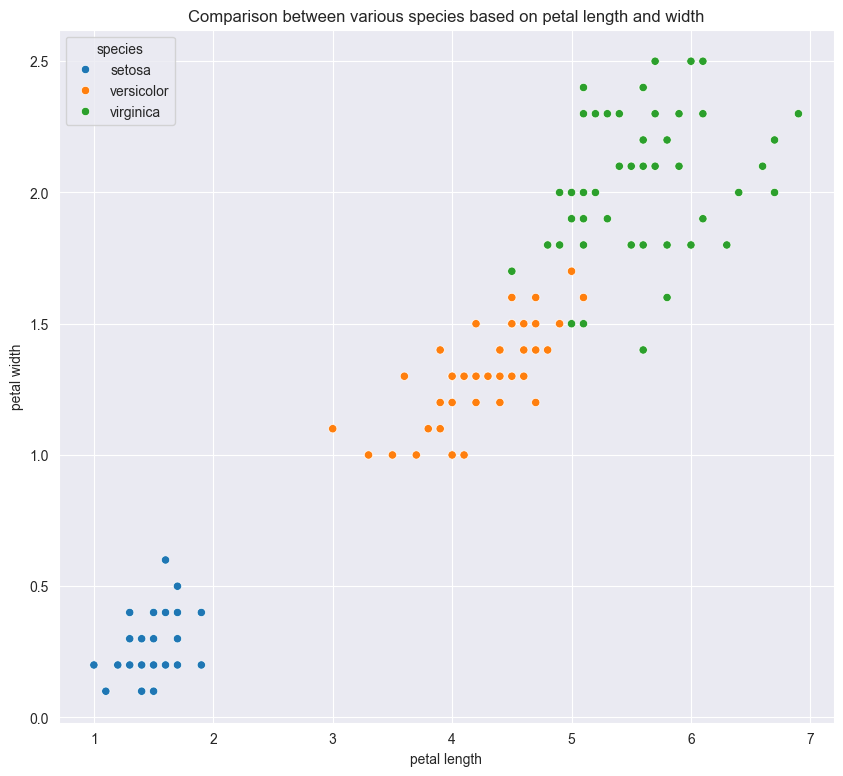

In [7]:
plt.figure(figsize=(10,9))
plt.title("Comparison between various species based on petal length and width")
sns.scatterplot(x=iris_df["petal length"], y=iris_df["petal width"], hue= iris_df["species"], data=iris_df)

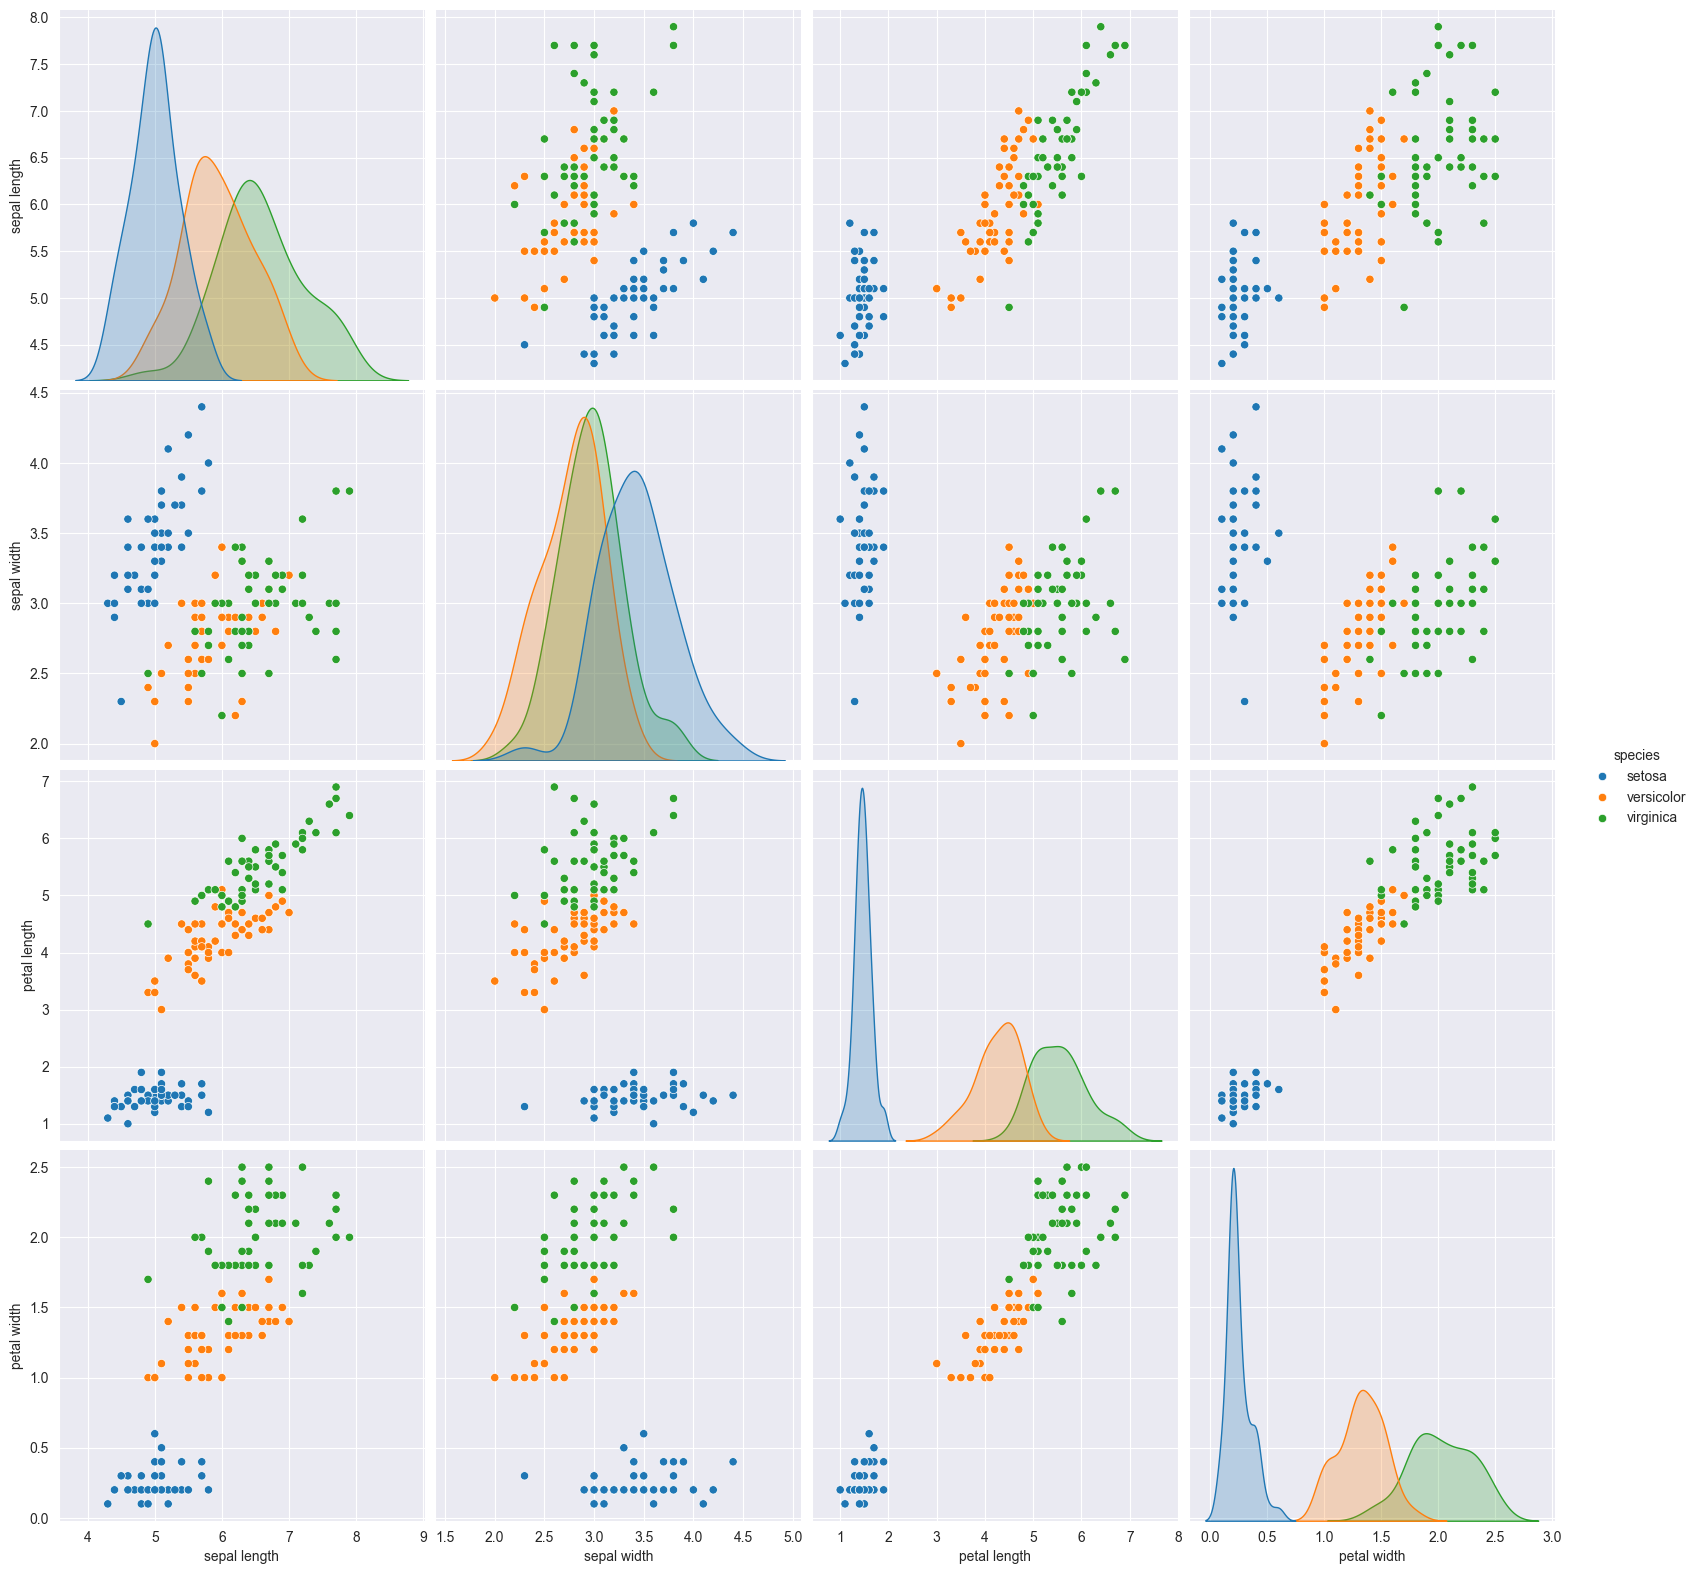

In [8]:
sns.pairplot(iris_df, hue="species", height=4)

<h3>Machine Learning</h3>

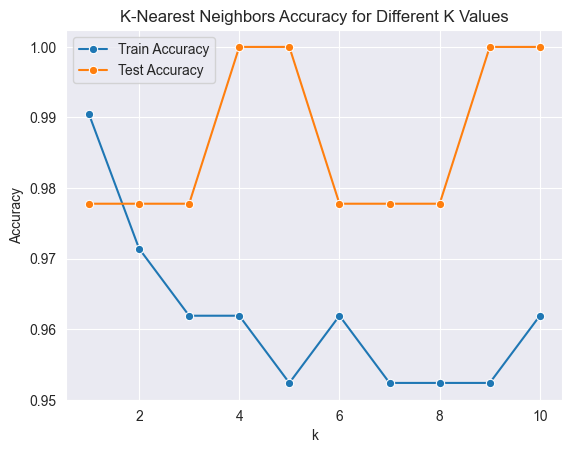

In [12]:
xbest = iris_df.drop(columns=["sepal length", "sepal width", "species"])
ybest = iris_df["species"]

xbesttrain, xbest_test, ybest_train, ybest_test = train_test_split(xbest, ybest, test_size=0.3, random_state=0)

scbest = StandardScaler()
xbesttrain = scbest.fit_transform(xbesttrain)
xbest_test = scbest.transform(xbest_test)

kbest_values = range(1, 11)
trainbest_accuracy = []
testbest_accuracy = []

for k in kbest_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xbesttrain, ybest_train)
    
    ybest_train_pred = knn.predict(xbesttrain)
    train_accuracy = accuracy_score(ybest_train, ybest_train_pred)
    trainbest_accuracy.append(train_accuracy)
    
    y_test_pred = knn.predict(xbest_test)
    test_accuracy = accuracy_score(ybest_test, y_test_pred)
    testbest_accuracy.append(test_accuracy)
    
sns.lineplot(x=kbest_values, y=trainbest_accuracy, marker='o', label='Train Accuracy')
sns.lineplot(x=kbest_values, y=testbest_accuracy, marker='o', label='Test Accuracy')
plt.title("K-Nearest Neighbors Accuracy for Different K Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
    
    

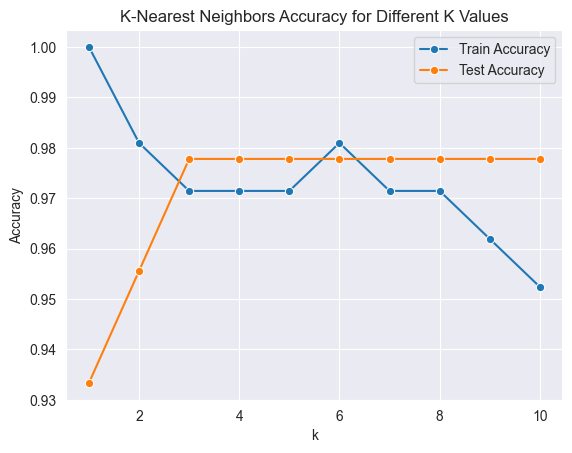

In [11]:
x = iris_df.drop(columns=["species"])
y = iris_df["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Define range of k values
k_values = range(1, 11)
train_accuracies = []
test_accuracies = []

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Calculate training accuracy
    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate test accuracy
    y_test_pred = knn.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot both training and test accuracies
sns.lineplot(x=k_values, y=train_accuracies, marker='o', label='Train Accuracy')
sns.lineplot(x=k_values, y=test_accuracies, marker='o', label='Test Accuracy')
plt.title("K-Nearest Neighbors Accuracy for Different K Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Question 2 (1000 pts)

In Case Study 6, we explored guage hight and stream flow values captured at 15-minute intervals over a 3-day period. You began by looking at the PMF and CDF of the guage measurements used KDE to understand the flow. In the end, you built a linear regression that uses guage height to predict to streamflow. All of this was based on a random sample of the data.

- Write a `for` loop that extracts a different random sample from the guage data in each iteration and computes PDF, CDF, KDE, and the regression model. Run at least 25 iterations and save the results.
- Run the same analysis as above on the full dataset. 
- Finally, build a plot or series of plots and tables that summarizes the differences between the sample runs and the full datasets. Analyze the results and comment on the differences or lack of differences.
- Explain in your own words why the correlation coefficient between guage height and streamflow is so high. 

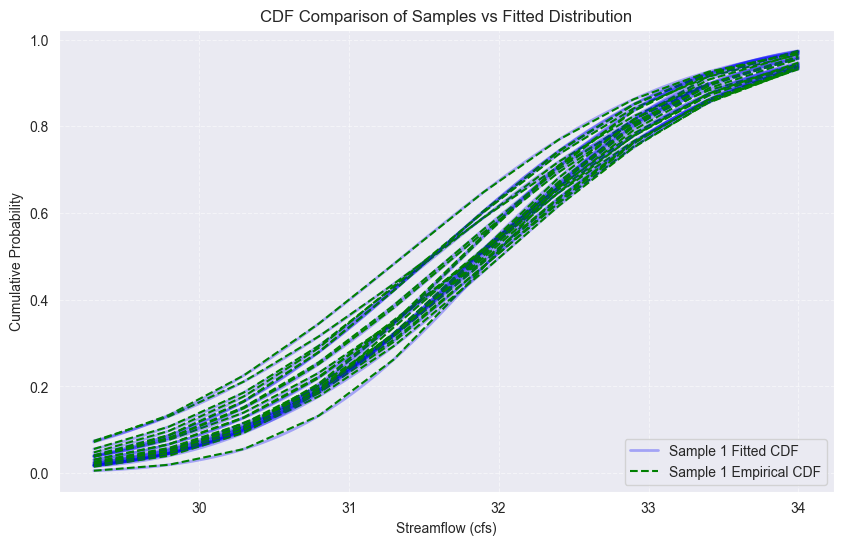

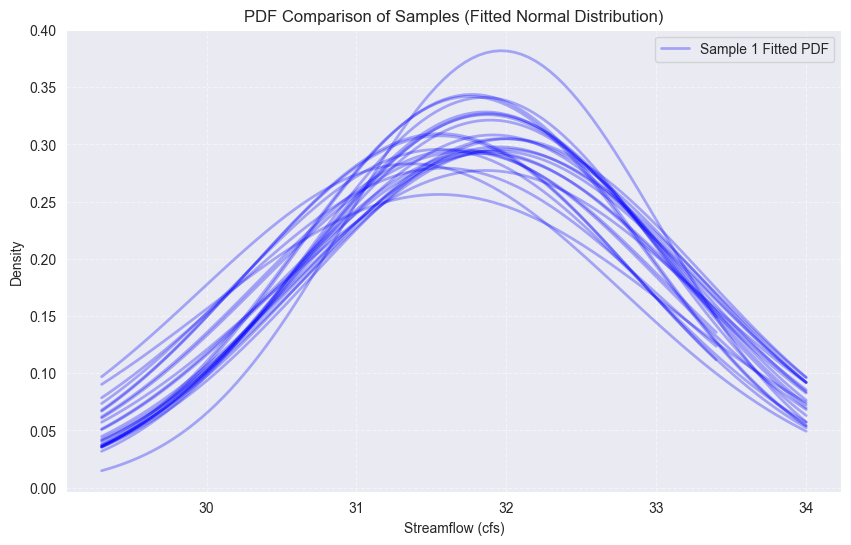

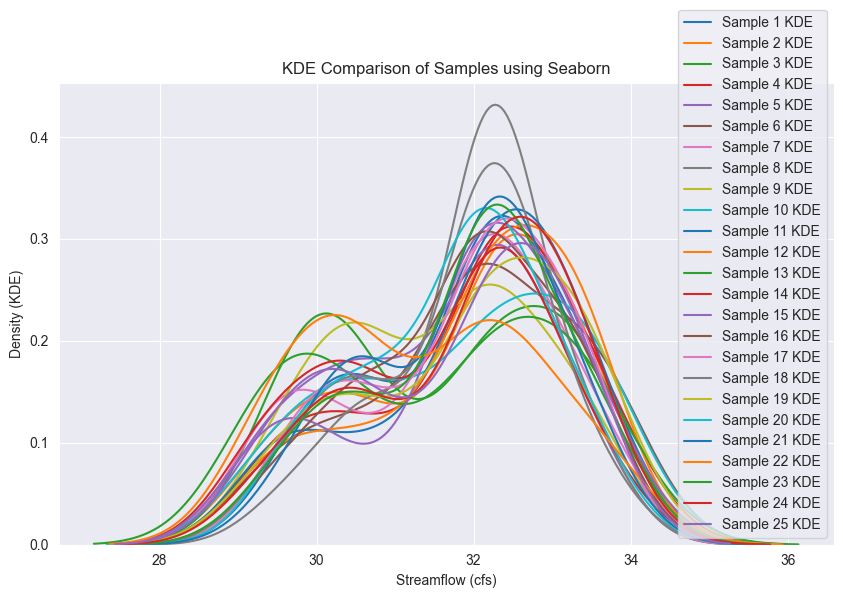

In [53]:
# Provide your answer the cells here and below.
eagledata = pd.read_excel(".\\Data\\gage_war_eagle.xlsx")

def analyzeData(data):
    flow = data["streamflow_cfs"]
    height = data["gage_height_ft"]
    
    # Fit a normal distribution to streamflow data
    flow_rv = stats.norm(flow.mean(), flow.std())
    flow_sorted = np.sort(flow)
    
    # Calculate PDF, CDF, and KDE
    sflow_pdf = flow_rv.pdf(flow_sorted)
    sflow_cdf = flow_rv.cdf(flow_sorted)
    kde = gaussian_kde(flow_sorted, bw_method=0.2)
    
    # Linear regression between height and flow
    result = stats.linregress(height, flow)
    
    # Return calculated results
    results = {
        'height': height.values,
        'flow_sorted': flow_sorted,
        'pdf': sflow_pdf,
        'cdf': sflow_cdf,
        'kde': kde(flow_sorted),
        'slope': result.slope,
        'intercept': result.intercept,
        'flow_rv': flow_rv
    }
    return results

# Generate 5 random samples and analyze each for demonstration
sample_results = []
for i in range(25):
    sample = eagledata.sample(n=50, random_state=i, axis=0, ignore_index=True)
    sample_results.append(analyzeData(sample))

# Full dataset analysis
full_results = analyzeData(eagledata)

# Plot CDFs for each sample compared to the fitted distribution CDF
plt.figure(figsize=(10, 6))
for i, sample in enumerate(sample_results):
    flow_sorted = sample['flow_sorted']
    sflow_cdf = sample['cdf']
    
    # Generate CDF for the full x range based on the fitted normal distribution
    x_val_range = np.linspace(flow_sorted.min(), flow_sorted.max(), 100)
    xvals_cdf_output = sample['flow_rv'].cdf(x_val_range)
    
    # Plot the fitted distribution CDF
    plt.plot(x_val_range, xvals_cdf_output, color="blue", alpha=0.3, linewidth=2, label=f"Sample {i+1} Fitted CDF" if i == 0 else "")

    # Plot the sample data's CDF
    plt.plot(flow_sorted, sflow_cdf, color="green", linestyle="--", label=f"Sample {i+1} Empirical CDF" if i == 0 else "")

# Titles, labels, legend, and grid for clarity
plt.title("CDF Comparison of Samples vs Fitted Distribution")
plt.xlabel("Streamflow (cfs)")
plt.ylabel("Cumulative Probability")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

plt.figure(figsize=(10, 6))
for i, sample in enumerate(sample_results):
    flow_sorted = sample['flow_sorted']
    sflow_pdf = sample['pdf']
    
    # Generate PDF for the fitted distribution
    x_val_range = np.linspace(flow_sorted.min(), flow_sorted.max(), 100)
    xvals_pdf_output = sample['flow_rv'].pdf(x_val_range)
    
    # Plot the fitted distribution PDF
    plt.plot(x_val_range, xvals_pdf_output, color="blue", alpha=0.3, linewidth=2, label=f"Sample {i+1} Fitted PDF" if i == 0 else "")

# Titles, labels, legend, and grid for clarity
plt.title("PDF Comparison of Samples (Fitted Normal Distribution)")
plt.xlabel("Streamflow (cfs)")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

plt.figure(figsize=(10, 6))
for i, result in enumerate(sample_results):  # Limiting to first 5 for clarity
    sns.kdeplot(result['flow_sorted'], label=f'Sample {i+1} KDE')

plt.title("KDE Comparison of Samples using Seaborn")
plt.xlabel("Streamflow (cfs)")
plt.ylabel("Density (KDE)")
plt.legend()
plt.show()
